# 2. Dane

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml

df = fetch_openml(data_id=31,parser='pandas')
y = df.target
X = df.data

In [3]:
y.value_counts()

good    700
bad     300
Name: class, dtype: int64

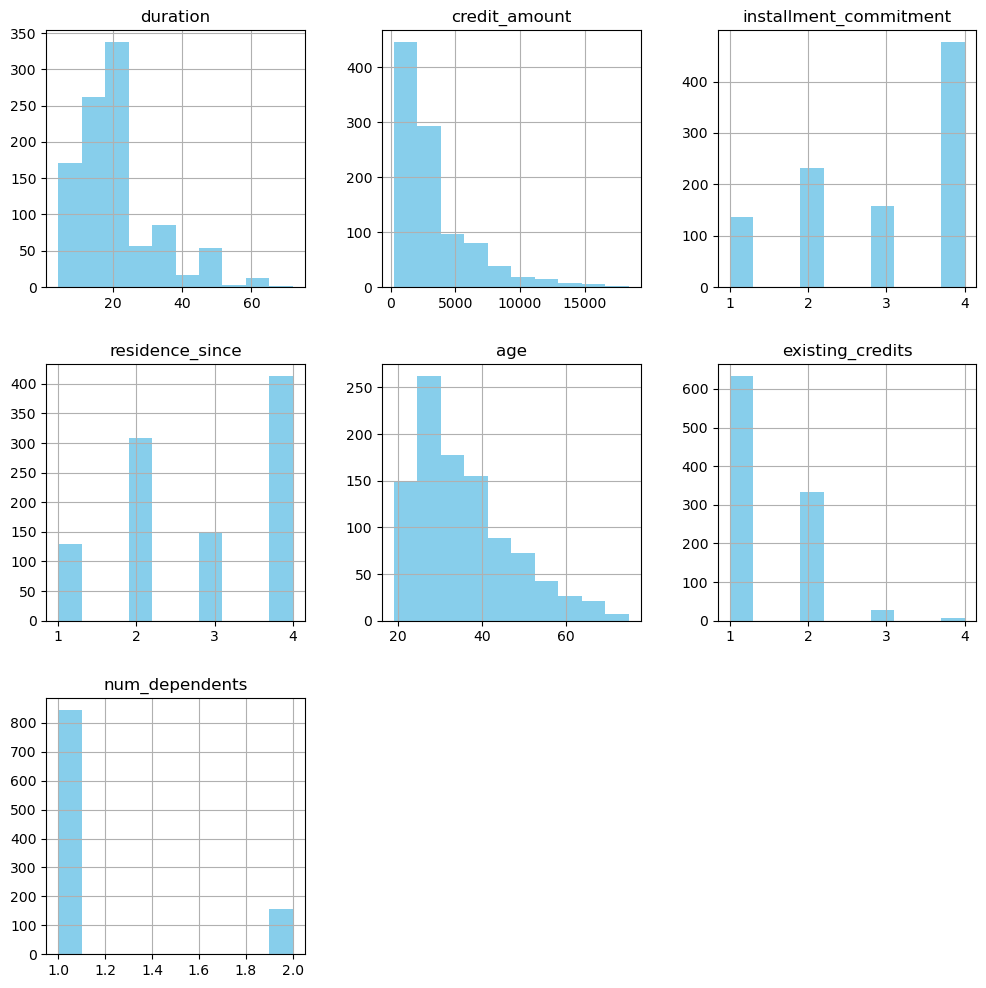

In [4]:
X.hist(figsize=(12,12),color = 'skyblue')
plt.savefig('dane1.pdf',format='pdf')

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [6]:
cat = ints = 0
for col in X.columns:
    if X[col].dtype == 'category':
        cat += 1
    else:
        ints += 1

print(f'W zbiorze atrybutów mamy {cat} kolumn typu "category", a {ints} kolumn typu "int64".')

W zbiorze atrybutów mamy 13 kolumn typu "category", a 7 kolumn typu "int64".


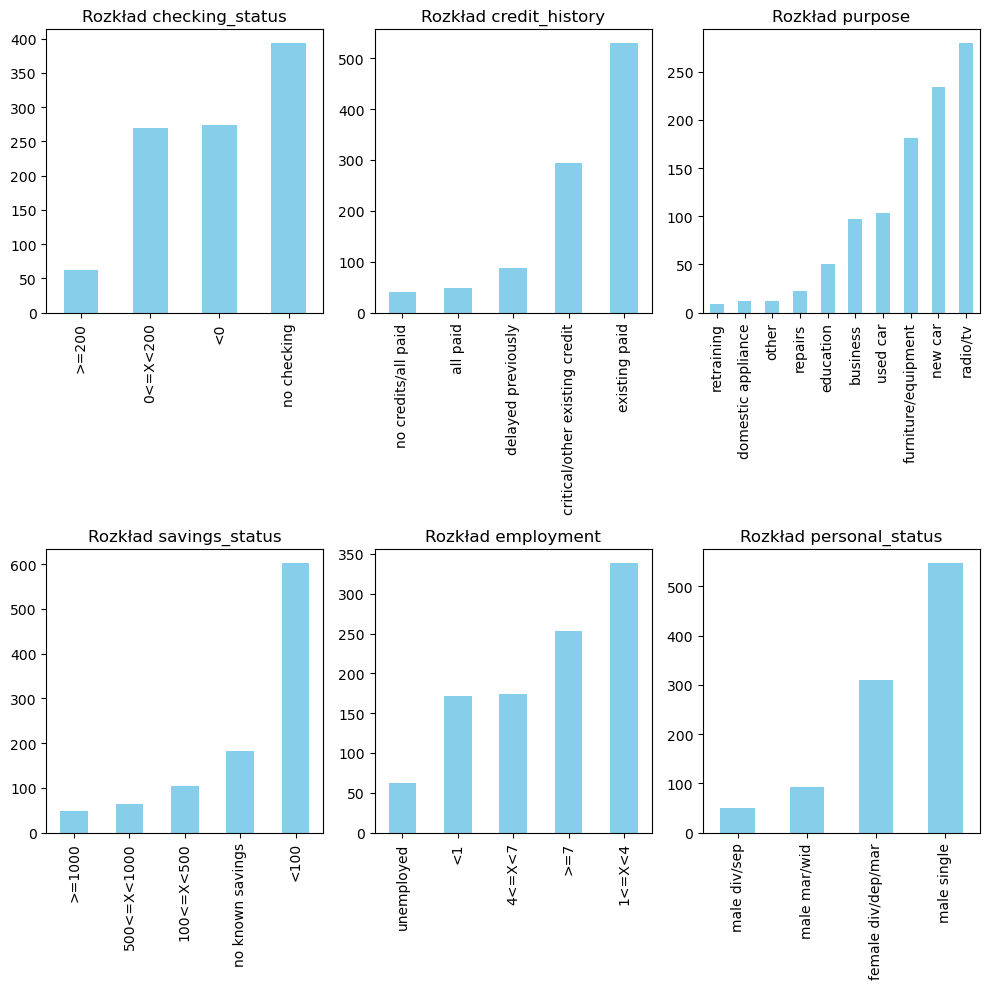

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, gridspec_kw={'height_ratios': [4,4]})
k = 0
for column in X.columns:
    if X[column].dtype == 'category' and column != 'foreign_worker':
        row_index = k // 3
        col_index = k % 3
        X[column].value_counts().sort_values().plot(kind='bar', ax=axes[row_index,col_index], color='skyblue',figsize=(10,10))
        axes[row_index,col_index].set_title(f'Rozkład {column}')
        k += 1
        if k > 5:
            break

plt.subplots_adjust(wspace=0.5, hspace=2)
plt.tight_layout()
plt.savefig('daneKAT1.pdf',format='pdf')
plt.show()

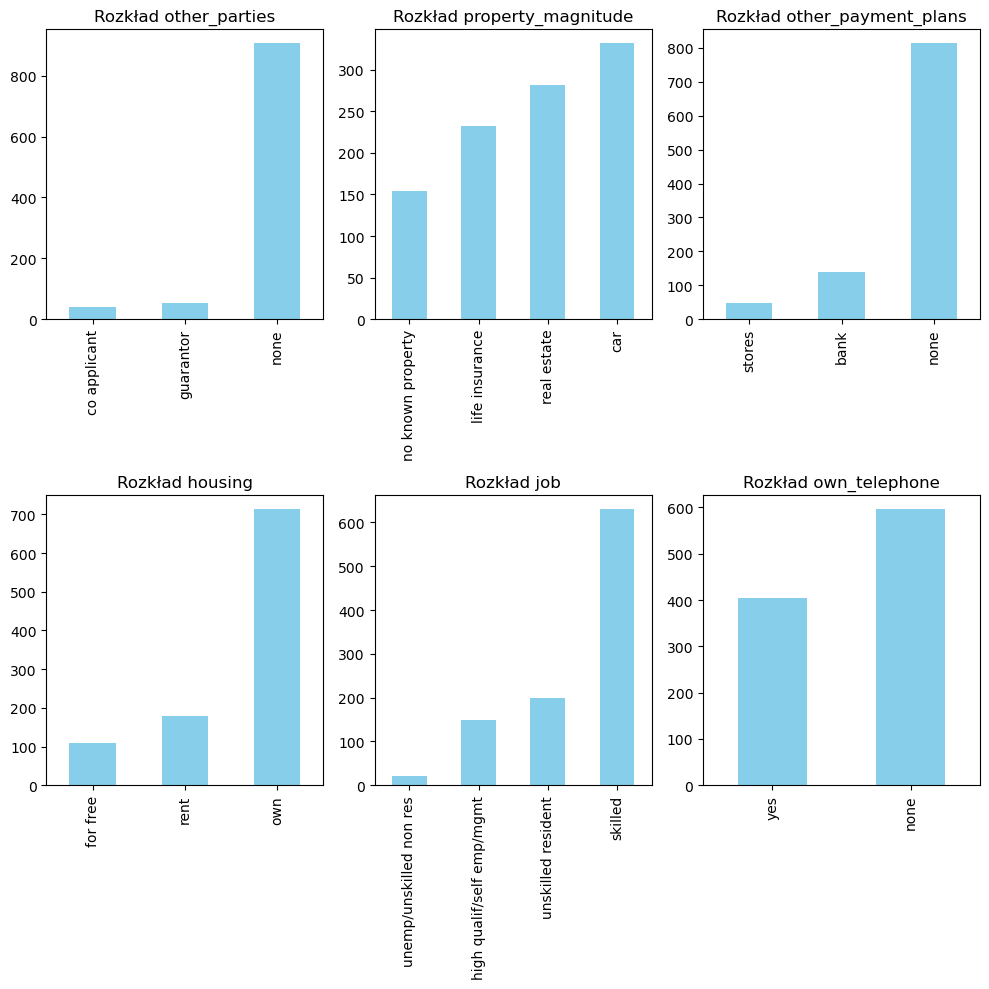

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3)
k = 0
j = 0
for column in X.columns:
    if X[column].dtype == 'category' and column != 'foreign_worker':
        if k < 6:
            k += 1
            continue
        
        row_index = j // 3
        col_index = j % 3
        X[column].value_counts().sort_values().plot(kind='bar', ax=axes[row_index,col_index], color='skyblue',figsize=(10,10))
        axes[row_index,col_index].set_title(f'Rozkład {column}')
        j += 1
        
plt.subplots_adjust(hspace=2)
plt.tight_layout()
plt.savefig('daneKAT2.pdf',format='pdf')
plt.show()

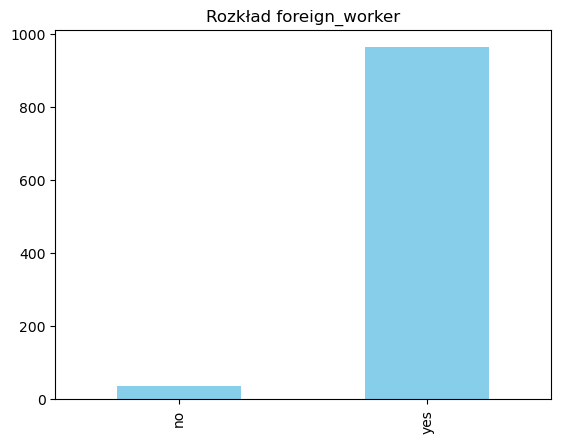

In [9]:
X['foreign_worker'].value_counts().sort_values().plot(kind='bar',color='skyblue')
plt.title('Rozkład foreign_worker')
plt.savefig('daneKAT3.pdf',format='pdf')
plt.show()

In [10]:
X.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


# 3. Zamiana danych 

In [11]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() 
y_float = labelencoder.fit_transform(y) 

In [12]:
y_float.sum()

700

In [ ]:
# a więc 1 odpowiada wartości 'good'
# 0 - 'bad'

In [13]:
# przekształcenia zbioru one hot encoding powinny być na całym zbiorze, 
# więc nie dzielimy jeszcze na train, test

In [14]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()

dfs = []
for column in X.columns:
    if X[column].dtype == 'category':
        one_hot_array = binarizer.fit_transform(X[[column]])
        if column == 'own_telephone' or column == 'foreign_worker':
            dfs.append(pd.DataFrame(one_hot_array,columns=[column]))
        else:
            column_names = [column + '_' + el for el in binarizer.classes_]
            dfs.append(pd.DataFrame(one_hot_array, columns=column_names))
    else:
        dfs.append(X[[column]])
# dfs to lista ramek danych, ktore zaraz nalezy polaczyc        

In [ ]:
#TRZEBA UWAŻAĆ, BO ZROBIŁEM FOREIGN WORKER 1 GDY NIE JEST OBCY

In [15]:
df = pd.concat(dfs, axis=1)
df['foreign_worker'] = 1- df['foreign_worker']

In [16]:
df

,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,duration,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,...,housing_own,housing_rent,existing_credits,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,num_dependents,own_telephone,foreign_worker
0,0,1,0,0,6,0,1,0,0,0,...,1,0,2,0,1,0,0,1,1,0
1,1,0,0,0,48,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
2,0,0,0,1,12,0,1,0,0,0,...,1,0,1,0,0,0,1,2,0,0
3,0,1,0,0,42,0,0,0,1,0,...,0,0,1,0,1,0,0,2,0,0
4,0,1,0,0,24,0,0,1,0,0,...,0,0,2,0,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,12,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
996,0,1,0,0,30,0,0,0,1,0,...,1,0,1,1,0,0,0,1,1,0
997,0,0,0,1,12,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
998,0,1,0,0,45,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0


# Regresja logistyczna

In [17]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
         df, y_float, test_size=0.23, random_state=311052)

In [19]:
lm = LogisticRegression(penalty=None, max_iter=300).fit(X_train,y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [20]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, 
        precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix)

Miary jakości modelu nieregularyzowanego obliczone na zbiorze treningowym
Macierz pomyłek: 
[[144  96]
 [ 58 472]]
Dokładność:  0.8
Precyzja:  0.831
Czułość:  0.891
AUC:  0.745


Miary jakości modelu nieregularyzowanego obliczone na zbiorze testowym
Macierz pomyłek: 
[[144  96]
 [ 58 472]]
Dokładność:  0.704
Precyzja:  0.807
Czułość:  0.788
AUC:  0.627


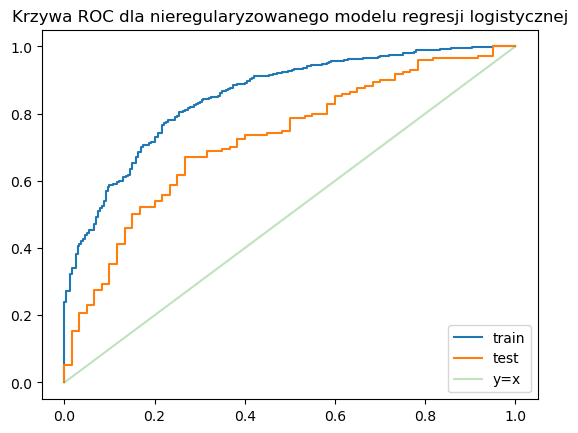

In [21]:
print("Miary jakości modelu nieregularyzowanego obliczone na zbiorze treningowym")
print('Macierz pomyłek: ')
print(confusion_matrix(y_train, y_pred_train))
print('Dokładność: ', round(accuracy_score(y_train, y_pred_train),3))
print('Precyzja: ', round(precision_score(y_train, y_pred_train),3))
print('Czułość: ', round(recall_score(y_train, y_pred_train),3))
print('AUC: ', round(roc_auc_score(y_train, y_pred_train),3))
print('\n')

print("Miary jakości modelu nieregularyzowanego obliczone na zbiorze testowym")
print('Macierz pomyłek: ')
print(confusion_matrix(y_train, y_pred_train))
print('Dokładność: ', round(accuracy_score(y_test, y_pred_test),3))
print('Precyzja: ', round(precision_score(y_test, y_pred_test),3))
print('Czułość: ', round(recall_score(y_test, y_pred_test),3))
print('AUC: ', round(roc_auc_score(y_test, y_pred_test),3))


y_pred_train_proba = lm.predict_proba(X_train)[:,1]
y_pred_test_proba = lm.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_train,y_pred_train_proba)
plt.plot(fpr,tpr,label='train')
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_pred_test_proba)
plt.plot(fpr1,tpr1,label='test')
plt.plot(np.arange(0,1+.01,0.01),np.arange(0,1+.01,0.01),'-',markersize=2,alpha=0.3,label='y=x')
plt.title("Krzywa ROC dla nieregularyzowanego modelu regresji logistycznej")
plt.legend(loc=4)
plt.savefig('regLoc1.pdf',format='pdf')
plt.show()

## Regularyzacja l2

In [22]:
import sklearn.model_selection as skm
from sklearn.linear_model import LogisticRegression
kfold = skm.KFold(5,
                  random_state=311052,
                  shuffle=True)

lml2 = LogisticRegression(penalty='l2', solver='liblinear').fit(X_train,y_train)

grid = skm.GridSearchCV(lml2,
                {'C':[0.001, 0.01, 0.1, .5, 1, 2, 5, 10,50, 80,90,100,200]}, 
                 refit=True,
                 cv=kfold,
                 scoring='precision')

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=311052, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 80, 90,
                               100, 200]},
             scoring='precision')

In [23]:
grid.best_params_

{'C': 90}

In [24]:
grid.cv_results_

{'mean_fit_time': array([0.00830102, 0.00652437, 0.01489153, 0.00889425, 0.01485558,
        0.01473484, 0.01525154, 0.01555676, 0.01454334, 0.01338477,
        0.01235032, 0.01606941, 0.0133945 ]),
 'std_fit_time': array([0.00545247, 0.00669914, 0.00346475, 0.00526197, 0.00359688,
        0.0058951 , 0.00335074, 0.00139482, 0.0044707 , 0.00426577,
        0.00370601, 0.00251979, 0.00362709]),
 'mean_score_time': array([0.00422058, 0.00630698, 0.00354567, 0.00923219, 0.00011044,
        0.00527921, 0.0045918 , 0.00289464, 0.0032618 , 0.00575256,
        0.00424199, 0.00444841, 0.00496368]),
 'std_score_time': array([0.00438634, 0.00643551, 0.00276575, 0.00586573, 0.00022087,
        0.0043289 , 0.00610536, 0.0039856 , 0.0036055 , 0.00498115,
        0.00371065, 0.00632365, 0.00379879]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 80, 90, 100,
                    200],
              mask=[False, False, False, False, False, False, False, False,
                

In [25]:
grid.cv_results_[('mean_test_score')]

array([0.71701297, 0.74012124, 0.7814691 , 0.79948398, 0.80135449,
       0.8032649 , 0.80449476, 0.80461137, 0.807404  , 0.807404  ,
       0.80893306, 0.80893306, 0.80893306])

In [26]:
best_lml2 = grid.best_estimator_

In [27]:
y_pred_train_l2 = best_lml2.predict(X_train)
y_pred_test_l2 = best_lml2.predict(X_test)

Miary jakości modelu regularyzowanego l2 z C=90 obliczone na zbiorze treningowym
Macierz pomyłek: 
[[144  96]
 [ 58 472]]
Dokładność:  0.803
Precyzja:  0.836
Czułość:  0.887
AUC:  0.752


Miary jakości modelu regularyzowanego l2 z C=90 obliczone na zbiorze testowym
Macierz pomyłek: 
[[148  92]
 [ 60 470]]
Dokładność:  0.717
Precyzja:  0.818
Czułość:  0.794
AUC:  0.647


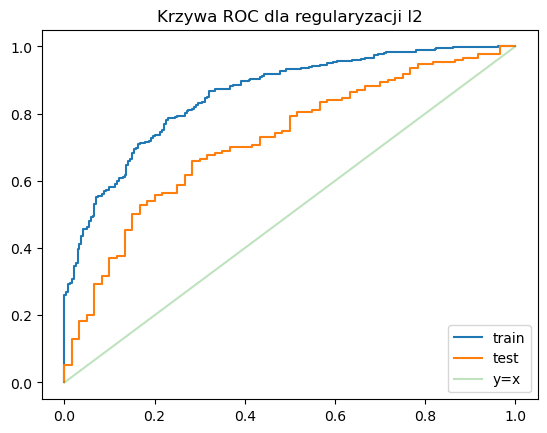

In [28]:
y_pred_train_l2 = best_lml2.predict(X_train)
y_pred_test_l2 = best_lml2.predict(X_test)
y_pred_train_l2_proba = best_lml2.predict_proba(X_train)[:,1]
y_pred_test_l2_proba = best_lml2.predict_proba(X_test)[:,1]

print("Miary jakości modelu regularyzowanego l2 z C=90 obliczone na zbiorze treningowym")
print('Macierz pomyłek: ')
print(confusion_matrix(y_train, y_pred_train))
print('Dokładność: ', round(accuracy_score(y_train, y_pred_train_l2),3))
print('Precyzja: ', round(precision_score(y_train, y_pred_train_l2),3))
print('Czułość: ', round(recall_score(y_train, y_pred_train_l2),3))
print('AUC: ', round(roc_auc_score(y_train, y_pred_train_l2),3))
print('\n')

print("Miary jakości modelu regularyzowanego l2 z C=90 obliczone na zbiorze testowym")
print('Macierz pomyłek: ')
print(confusion_matrix(y_train, y_pred_train_l2))
print('Dokładność: ', round(accuracy_score(y_test, y_pred_test_l2),3))
print('Precyzja: ', round(precision_score(y_test, y_pred_test_l2),3))
print('Czułość: ', round(recall_score(y_test, y_pred_test_l2),3))
print('AUC: ', round(roc_auc_score(y_test, y_pred_test_l2),3))


fpr, tpr, thresholds = roc_curve(y_train,y_pred_train_l2_proba)
plt.plot(fpr,tpr,label='train')
plt.title("Krzywa ROC dla regularyzacji l2")

fpr1, tpr1, thresholds1 = roc_curve(y_test,y_pred_test_l2_proba)
plt.plot(fpr1,tpr1,label='test')

plt.plot(np.arange(0,1+.05,0.05),np.arange(0,1+.05,0.05),'-',alpha=.3,label='y=x')

plt.legend(loc=4)
plt.savefig('regLoc2.pdf',format='pdf')
plt.show()



## Regularyzacja l1

In [29]:
lml1 = LogisticRegression(penalty='l1',solver='liblinear',random_state=311052).fit(X_train,y_train)
kfold = skm.KFold(5,
                  random_state=311052,
                  shuffle=True)

grid1 = skm.GridSearchCV(lml1,
                {'C':[0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10,30,50,80, 100,1000]}, 
                 refit=True,
                 cv=kfold,
                 scoring='precision')

grid1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=311052, shuffle=True),
             estimator=LogisticRegression(penalty='l1', random_state=311052,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 30, 50, 80,
                               100, 1000]},
             scoring='precision')

In [31]:
grid1.best_params_

{'C': 30}

In [32]:
best_lml1 = grid1.best_estimator_

In [33]:
y_pred_train_l1 = best_lml1.predict(X_train)
y_pred_test_l1 = best_lml1.predict(X_test)

y_pred_train_l1_proba = best_lml1.predict_proba(X_train)[:,1]
y_pred_test_l1_proba = best_lml1.predict_proba(X_test)[:,1]

In [34]:
print("Miary jakości modelu regularyzowanego l1 z C=30 obliczone na zbiorze treningowym")
print('Macierz pomyłek: ')
print(confusion_matrix(y_train, y_pred_train_l1))
print('Dokładność: ', round(accuracy_score(y_train, y_pred_train_l1),3))
print('Precyzja: ', round(precision_score(y_train, y_pred_train_l1),3))
print('Czułość: ', round(recall_score(y_train, y_pred_train_l1),3))
print('AUC: ', round(roc_auc_score(y_train, y_pred_train_l1),3))
print('\n')

print("Miary jakości modelu regularyzowanego l1 obliczone na zbiorze testowym")
print('Macierz pomyłek: ')
print(confusion_matrix(y_train, y_pred_train_l1))
print('Dokładność: ', round(accuracy_score(y_test, y_pred_test_l1),3))
print('Precyzja: ', round(precision_score(y_test, y_pred_test_l1),3))
print('Czułość: ', round(recall_score(y_test, y_pred_test_l1),3))
print('AUC: ', round(roc_auc_score(y_test, y_pred_test_l1),3))

Miary jakości modelu regularyzowanego l1 z C=30 obliczone na zbiorze treningowym
Macierz pomyłek: 
[[148  92]
 [ 60 470]]
Dokładność:  0.803
Precyzja:  0.836
Czułość:  0.887
AUC:  0.752


Miary jakości modelu regularyzowanego l1 obliczone na zbiorze testowym
Macierz pomyłek: 
[[148  92]
 [ 60 470]]
Dokładność:  0.717
Precyzja:  0.818
Czułość:  0.794
AUC:  0.647


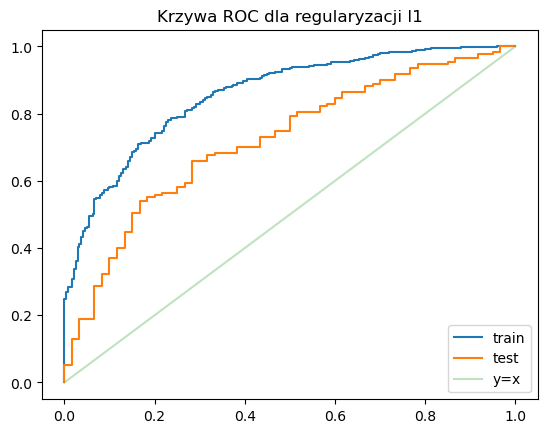

In [35]:
fpr1, tpr1, thresholds1 = roc_curve(y_train,y_pred_train_l1_proba)
fpr2, tpr2, thresholds2 = roc_curve(y_test,y_pred_test_l1_proba)

plt.plot(fpr1,tpr1,label='train')
plt.title("Krzywa ROC dla regularyzacji l1")

plt.plot(fpr2,tpr2,label='test')

plt.plot(np.arange(0,1+.05,0.05),np.arange(0,1+.05,0.05),'-',alpha=.3,label='y=x')

plt.legend(loc=4)
plt.savefig('regLoc3.pdf',format='pdf')
plt.show()



## Wykresy ROC

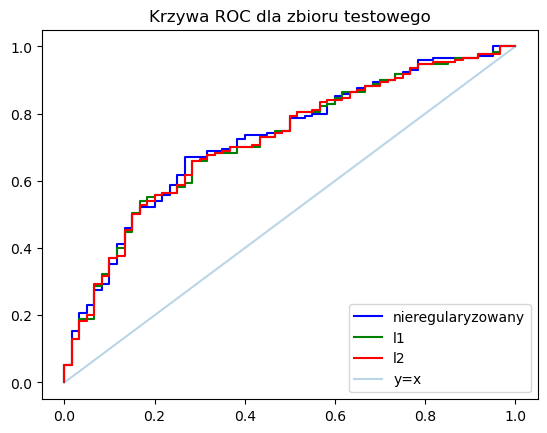

In [36]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_test_proba)
fpr1, tpr1, thresholds = roc_curve(y_test,y_pred_test_l1_proba)
fpr2, tpr2, thresholds = roc_curve(y_test,y_pred_test_l2_proba)

plt.plot(fpr,tpr,'b', label='nieregularyzowany')
plt.plot(fpr1,tpr1,'g', label='l1')
plt.plot(fpr2,tpr2,'r',label='l2') 
plt.plot(np.arange(0,1+0.05,0.05),np.arange(0,1+.05,0.05),'-',markersize=2,alpha=0.3,label='y=x')
plt.title("Krzywa ROC dla zbioru testowego")
plt.legend(loc = 4)
plt.savefig('regLoc20.pdf',format='pdf')

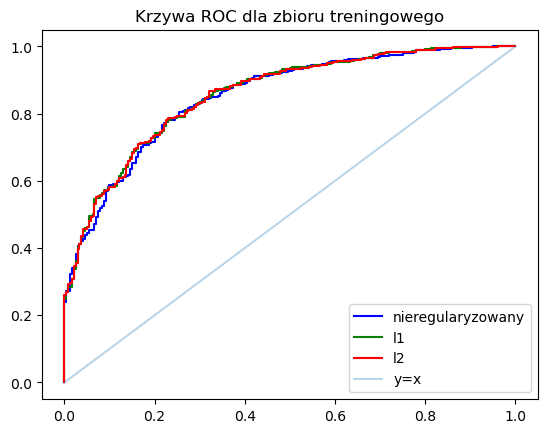

In [37]:
fpr, tpr, thresholds = roc_curve(y_train,y_pred_train_proba)
fpr1, tpr1, thresholds1 = roc_curve(y_train,y_pred_train_l1_proba)
fpr2, tpr2, thresholds2 = roc_curve(y_train,y_pred_train_l2_proba)

plt.plot(fpr,tpr,'b', label='nieregularyzowany')
plt.plot(fpr1,tpr1,'g', label='l1')
plt.plot(fpr2,tpr2,'r',label='l2') 
plt.plot(np.arange(0,1+.05,0.05),np.arange(0,1+.05,0.05),'-',markersize=2,alpha=0.3,label='y=x')
plt.title("Krzywa ROC dla zbioru treningowego")
plt.legend(loc = 4)
plt.savefig('regLoc10.pdf',format='pdf')

# Ewentualne usunięcie pewnych kolumn

In [38]:
best_lml1.coef_

array([[ 4.28800494e-01, -9.72590226e-02,  1.24551570e+00,
         1.85860283e+00, -3.25901381e-02, -3.98054859e-01,
         1.15411465e+00,  5.47736700e-01,  1.13757125e-01,
        -9.45030124e-01,  3.74627631e-01, -3.14359290e-01,
        -4.59105553e-01,  3.13473683e-01, -4.46531275e-01,
         9.60884064e-01,  6.79845552e-01, -7.65912149e-01,
         1.34597429e+00,  1.24887366e+00, -1.20657295e-04,
         3.82363890e-01,  3.78998608e-01, -8.32558091e-02,
         9.72487925e-01,  1.01428080e+00, -1.75893496e-01,
         5.69098576e-01, -1.52323460e-01,  3.26749649e-03,
         1.64778678e-01, -3.36683067e-01, -7.20863237e-02,
        -4.85259538e-02, -2.69440855e-02,  4.02018933e-01,
        -4.15720979e-02,  1.12431294e+00,  2.08028172e-01,
         1.11008812e-02,  3.67567532e-01,  5.25086673e-02,
        -3.92542792e-01,  3.42048973e-01,  2.17476967e-02,
        -4.87959956e-01,  3.46938033e-01, -2.57800642e-01,
         7.12696998e-01,  1.70539425e-01, -1.18711094e-0

In [39]:
print((np.absolute(best_lml1.coef_)>8*10e-2)[0])
np.unique(np.absolute(best_lml1.coef_)>8*10e-2, return_counts=True)
df.columns[(np.absolute(best_lml1.coef_)>8*10e-2)[0]]

[False False  True  True False False  True False False  True False False
 False False False  True False False  True  True False False False False
  True  True False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False  True]


Index(['checking_status_>=200', 'checking_status_no checking',
       'credit_history_critical/other existing credit',
       'credit_history_no credits/all paid', 'purpose_other',
       'purpose_retraining', 'purpose_used car', 'savings_status_>=1000',
       'savings_status_no known savings', 'other_parties_guarantor',
       'foreign_worker'],
      dtype='object')

In [40]:
df_dropped = df.drop(columns=df.columns[(np.absolute(best_lml1.coef_)>8*10e-2)[0]])

In [42]:
print(len(df_dropped.columns))
print(len(df.columns))

48
59


In [43]:
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(
    df_dropped,y_float,random_state=311052, test_size=0.23)

In [44]:
lml1_dropped = LogisticRegression(penalty='l1',C=10,solver='liblinear')

grid = skm.GridSearchCV(lml1_dropped,
                {'C':[0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 100,]}, 
                 refit=True,
                 cv=kfold,
                 scoring='precision')

grid.fit(X_train_dropped, y_train_dropped)

GridSearchCV(cv=KFold(n_splits=5, random_state=311052, shuffle=True),
             estimator=LogisticRegression(C=10, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 100]},
             scoring='precision')

In [45]:
lml1_dropped_best = grid.best_estimator_

In [46]:
y_pred_test_dropped_l1 = lml1_dropped_best.predict(X_test_dropped)
y_pred_train_dropped_l1 = lml1_dropped_best.predict(X_train_dropped)

y_pred_test_dropped_l1_proba = lml1_dropped_best.predict_proba(X_test_dropped)[:,1]
y_pred_train_dropped_l1_proba = lml1_dropped_best.predict_proba(X_train_dropped)[:,1]


Miary jakości modelu regularyzowanego l1 DROPPED obliczone na zbiorze testowym
Macierz pomyłek: 
[[ 29  31]
 [ 33 137]]
Dokładność:  0.722
Precyzja:  0.815
Czułość:  0.806
AUC:  0.645


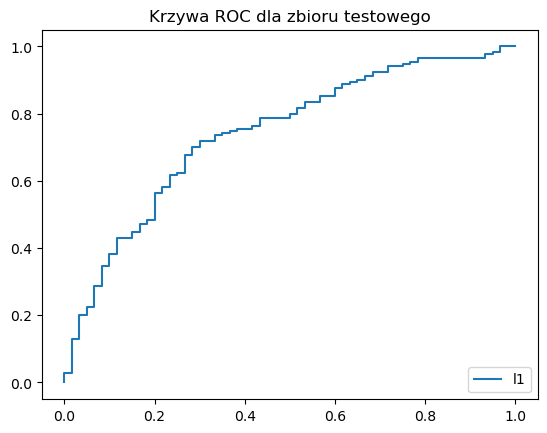

In [56]:
print("Miary jakości modelu regularyzowanego l1 DROPPED obliczone na zbiorze testowym")
print('Macierz pomyłek: ')
print(confusion_matrix(y_test_dropped, y_pred_test_dropped_l1))
print('Dokładność: ', round(accuracy_score(y_test_dropped, y_pred_test_dropped_l1),3))
print('Precyzja: ', round(precision_score(y_test_dropped, y_pred_test_dropped_l1),3))
print('Czułość: ', round(recall_score(y_test_dropped, y_pred_test_dropped_l1),3))
print('AUC: ', round(roc_auc_score(y_test_dropped, y_pred_test_dropped_l1),3))
fpr, tpr, thresholds = roc_curve(y_test_dropped,y_pred_test_dropped_l1_proba)
plt.plot(fpr,tpr,label='l1')
plt.title("Krzywa ROC dla zbioru testowego")
plt.legend(loc = 4)

Miary jakości modelu regularyzowanego l1 DROPPED obliczone na zbiorze trenigowym
Macierz pomyłek: 
[[141  99]
 [ 62 468]]
Dokładność:  0.791
Precyzja:  0.825
Czułość:  0.883
AUC:  0.735


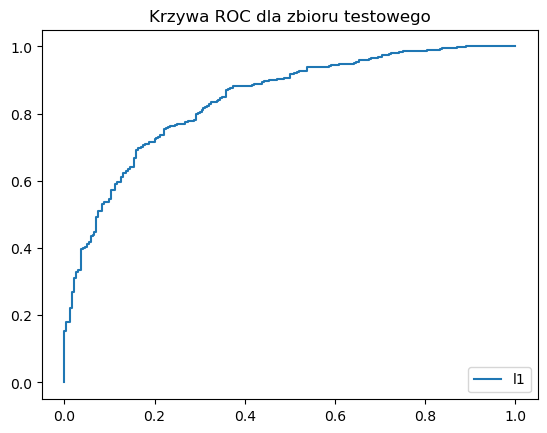

In [48]:
print("Miary jakości modelu regularyzowanego l1 DROPPED obliczone na zbiorze trenigowym")
print('Macierz pomyłek: ')
print(confusion_matrix(y_train_dropped, y_pred_train_dropped_l1))
print('Dokładność: ', round(accuracy_score(y_train_dropped, y_pred_train_dropped_l1),3))
print('Precyzja: ', round(precision_score(y_train_dropped, y_pred_train_dropped_l1),3))
print('Czułość: ', round(recall_score(y_train_dropped, y_pred_train_dropped_l1),3))
print('AUC: ', round(roc_auc_score(y_train_dropped, y_pred_train_dropped_l1),3))
fpr, tpr, thresholds = roc_curve(y_train_dropped,y_pred_train_dropped_l1_proba)
plt.plot(fpr,tpr,label='l1')
plt.title("Krzywa ROC dla zbioru testowego")
plt.legend(loc = 4)

# SVM

In [49]:
from sklearn.svm import SVC
svm_linear = SVC(C = 0.1, kernel = 'linear').fit(X_train_dropped,y_train_dropped)

In [50]:
y_svm_train_pred = svm_linear.predict(X_train_dropped)
y_svm_test_pred = svm_linear.predict(X_test_dropped)

Miary jakości modelu svm obliczone na zbiorze testowym
Macierz pomyłek: 
[[ 30  30]
 [ 36 134]]
Dokładność:  0.713
Precyzja:  0.817
Czułość:  0.788
AUC:  0.644


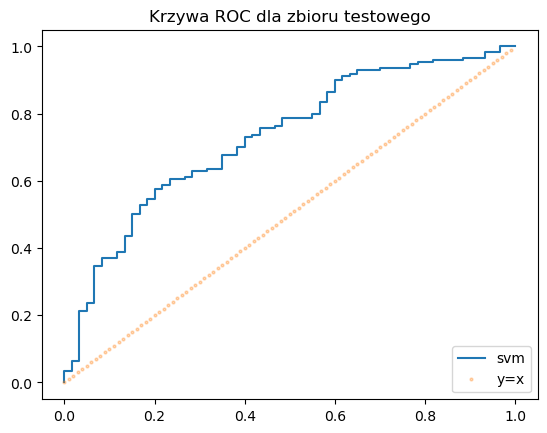

In [55]:
print("Miary jakości modelu svm obliczone na zbiorze testowym")
print('Macierz pomyłek: ')
print(confusion_matrix(y_test, y_svm_test_pred))
print('Dokładność: ', round(accuracy_score(y_test, y_svm_test_pred),3))
print('Precyzja: ', round(precision_score(y_test, y_svm_test_pred),3))
print('Czułość: ', round(recall_score(y_test, y_svm_test_pred),3))
print('AUC: ', round(roc_auc_score(y_test, y_svm_test_pred),3))

y_svm_train_pred_proba = svm_linear.decision_function(X_train_dropped)
y_svm_test_pred_proba = svm_linear.decision_function(X_test_dropped)

fpr, tpr, thresholds = roc_curve(y_test,y_svm_test_pred_proba)
plt.plot(fpr,tpr,label='svm')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'o',markersize=2,alpha=0.3,label='y=x')
plt.title("Krzywa ROC dla zbioru testowego")
plt.legend(loc = 4)
plt.savefig('svm1.pdf',format='pdf')

Miary jakości modelu svm obliczone na zbiorze treningowym
Macierz pomyłek: 
[[ 30  30]
 [ 36 134]]
Dokładność:  0.79
Precyzja:  0.822
Czułość:  0.887
AUC:  0.731


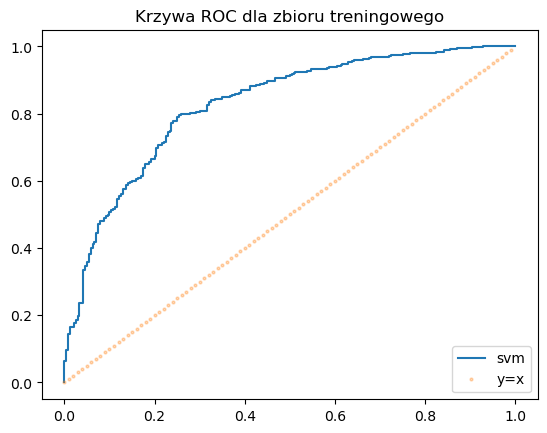

In [54]:
print("Miary jakości modelu svm obliczone na zbiorze treningowym")
print('Macierz pomyłek: ')
print(confusion_matrix(y_test, y_svm_test_pred))
print('Dokładność: ', round(accuracy_score(y_train, y_svm_train_pred),3))
print('Precyzja: ', round(precision_score(y_train, y_svm_train_pred),3))
print('Czułość: ', round(recall_score(y_train, y_svm_train_pred),3))
print('AUC: ', round(roc_auc_score(y_train, y_svm_train_pred),3))
fpr, tpr, thresholds = roc_curve(y_train,y_svm_train_pred_proba)
plt.plot(fpr,tpr,label='svm')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'o',markersize=2,alpha=0.3,label='y=x')
plt.title("Krzywa ROC dla zbioru treningowego")
plt.legend(loc = 4)
plt.savefig('svm2.pdf', format='pdf')